# 연속형 확률변수

연속형(continuous) 확률변수 : 확률변수 X가 연속적인 구간 내의 값을 취한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

## 연속형 확률변수

### 연속형 확률변수의 정의

확률변수가 취할 수 있는 값은 구간 [a, b]로 정의되며 확률은 확률밀도함수 probablity density function, PDF 라고 부르는 f(x)에 의해 정의된다.

$$ P(x_0 \le X \le x_1) = \int_{x_0}^{X_1} f(x)\, dx$$

이 적분은 밀도함수 f(x)와 x축 그리고 두직선 $x = x_0, x=x_1$로 둘러싸인 영영의 면적으로 해설할 수 있다. 

불공정한 룰렛을 예로들어 구현해보다. 취할 수 있는 값의 구간에 대한 하한과 상한을 x_range로 정의한다.

In [3]:
x_range = np.array([0, 1])

밀도함수를 구현한다. 예를들어 불공정한 룰렛은 큰 값일수록 나오기 쉽다고 하자. 

$$ f(x) = 2x, \qquad (0 \le x \le 1) $$

In [4]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [5]:
# 확률변수 X
X = [x_range, f]

불공정한 룰셋이 0.4부터 0.6사이의 값을 취할 확률을 다음과 같이 표시할 수 있다.

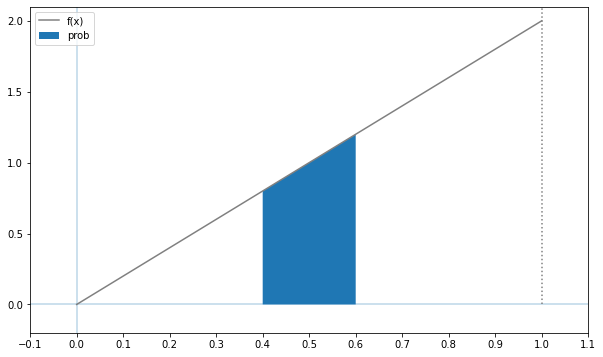

In [6]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

적분은 intergrate의 quad 함수를 사용하여 다음과 같이 구할 수 있다. 

$$ P(0.4 \le X \le 0.6) = \int_{0.4}^{0.6} 2x\, dx$$

In [7]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

첫번째 리턴값이 적분 값이므로 확률이 0.2임을 알 수 있다.

#### 연속형 확률의 성질

$$ f(x) \ge 0$$
$$ \int_{-\infty}^{\infty} f(x)\, dx = 1$$

In [8]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

함수의 최소값이 0이상이라는 것은 f(x)가 항상 0 이상의 값을 가진다는 의미이다. 최소값이 0이상리라는 것은 첫번째 성질을 만족한다는 것이다.   
두번째 $ -\infty ~ \infty $에서 적분 결과가 1이라는 것은 위 그래프에서 삼각형의 면적이 1이라는 것과 같은 의미이다.

In [9]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

#### 누적분포함수 

확률변수 X가 x이하가 될 때의 확률을 반환하는 함수이다. cumulative distribution function, CDF 라고 한다.
$$ F(x) = P(X \le x) = \int_{-\infty}^{x} f(x)\, dx $$

In [10]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

다음과 같이 구할 수도 있다. 

$$ P(0.4 \le X \le 0.6) = F(0.6) - F(0.4) $$

In [11]:
F(0.6) - F(0.4)

0.200

#### 누적분포함수 F(X)의 그래프

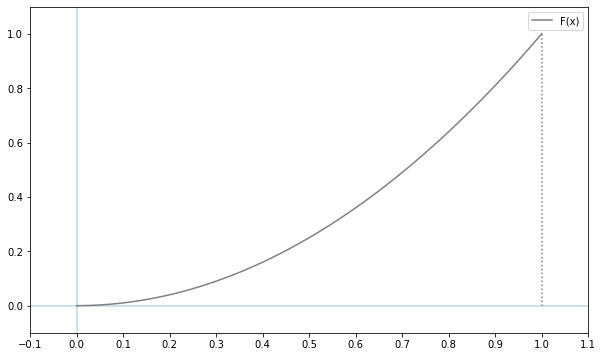

In [12]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 연속형 확률분포의 지표

#### 기대값, 평균

$$ E(X) = \int_{-\infty}^{\infty} xf(x)\, dx $$

앞서 본 불공정한 룰렛의 밀도함수 f(x)에 대해서 기대값을 구하는 함수를 만들어 보자.

In [13]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0] 

0.667

#### 기대값과 분산의 성질 

- $E(aX + b) = aE(X) + b$
- $Var(aX + b) = a^2Var(X)$

In [14]:
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [15]:
E(X)

0.667

In [16]:
# Y= 2X + 3 의 기대값을 계산
E(X, g=lambda x: 2*x+3)

4.333

In [17]:
2 * E(X) + 3

4.333

#### 분산

$$ \sigma^2 = Var(X) = \int_{-\infty}^{\infty} (x-\mu)^2f(x)\, dx $$

불공정한 룰렛의 분산을 구하면 다음과 같다.

In [18]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [19]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [20]:
V(X)

0.056

In [21]:
# Y= 2X + 3 의 분산을 계산
V(X, lambda x: 2*x + 3)

0.222

In [22]:
2**2 * V(X)

0.222